<a href="https://colab.research.google.com/github/mahdi201/Coursera-Programming-for-Everybody-Getting-Started-with-Python/blob/master/Optics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import OPTICS
import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter

In [ ]:
df = pd.read_csv("wine.data")

In [ ]:
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [ ]:
data = df.iloc[:,1:3]

In [ ]:
model = OPTICS(min_samples=20).fit(data)
print(model)

OPTICS(algorithm='auto', cluster_method='xi', eps=None, leaf_size=30,
       max_eps=inf, metric='minkowski', metric_params=None,
       min_cluster_size=None, min_samples=20, n_jobs=None, p=2,
       predecessor_correction=True, xi=0.05)


In [ ]:
print(Counter(model.labels_))

Counter({-1: 87, 0: 50, 1: 40})


In [ ]:
outliers_df = pd.DataFrame(data)

In [ ]:
print(outliers_df[model.labels_==-1])

     14.23  1.71
1    13.16  2.36
2    14.37  1.95
3    13.24  2.59
5    14.39  1.87
7    14.83  1.64
..     ...   ...
172  13.71  5.65
173  13.40  3.91
174  13.27  4.28
175  13.17  2.59
176  14.13  4.10

[87 rows x 2 columns]


Text(0.5, 1.0, 'DBSCAN for outlier detection')

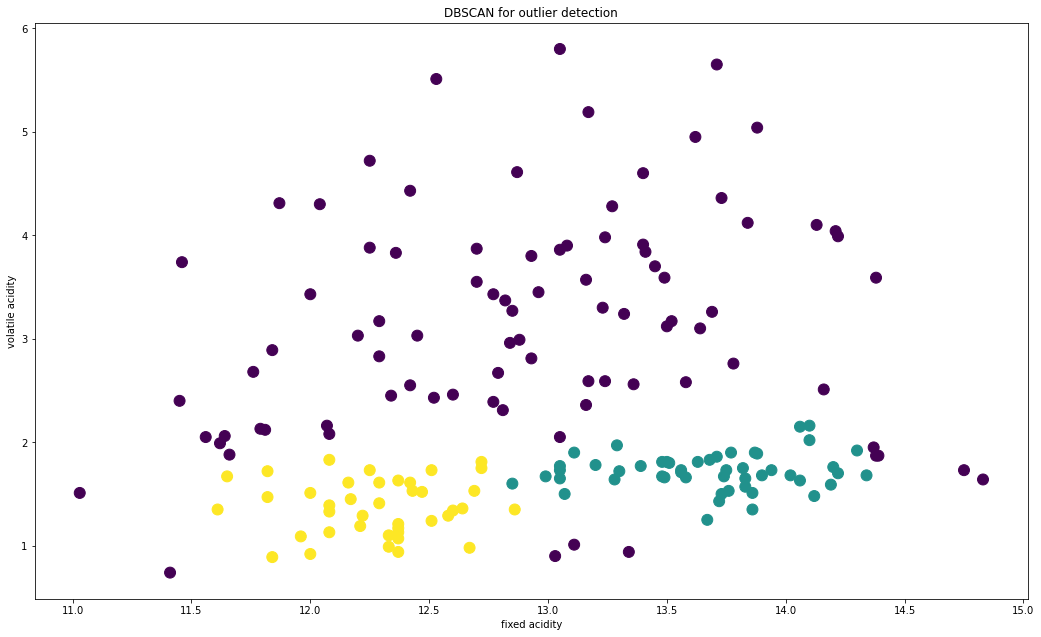

In [ ]:
fig = plt.figure()

ax = fig.add_axes([.1,.1, 2.3,2])

colors = model.labels_

#ax.scatter(data[:,3], data[data:,2], c=colors, s=120)
ax.scatter(data.iloc[:,0].values,data.iloc[:,1].values,c=colors, s=120)

ax.set_xlabel('fixed acidity')
ax.set_ylabel('volatile acidity')

plt.title('DBSCAN for outlier detection')